# Import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain, combinations
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load dataset robustly


In [2]:
df = pd.read_csv("Assignment-1_Data.csv", sep=";")

In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [4]:
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,"4,95",12680.0,France


In [5]:
df.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


# Basic info & missing values


In [7]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [8]:
df["CustomerID"]=df["CustomerID"].fillna(0)
df["Itemname"]=df["Itemname"].fillna("unknown")

In [9]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [10]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Keep only the date (drop the time)
df["Date"] = df["Date"].dt.date

df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,"3,39",17850.0,United Kingdom


In [11]:
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,"4,95",12680.0,France


In [12]:
df["Price"] = df["Price"].astype(str).str.replace(",", ".").astype(float)

df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [13]:
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


In [14]:
df.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [15]:
df["BillNo"] = pd.to_numeric(df["BillNo"], errors="coerce")
df = df.dropna(subset=["BillNo"])
df["BillNo"] = df["BillNo"].astype(int)


In [16]:
df.dtypes

BillNo          int32
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [17]:
df.shape

(522061, 7)

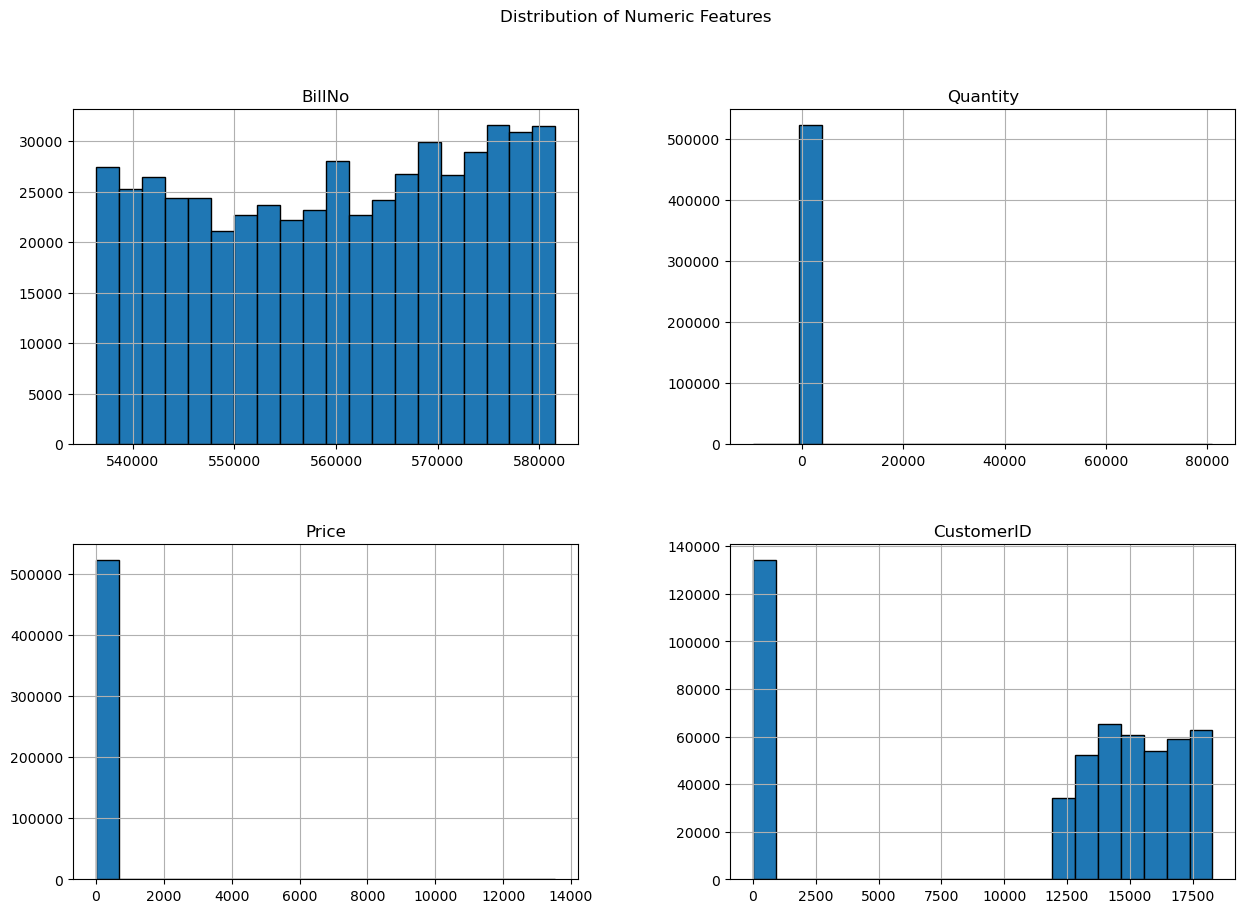

In [18]:
numeric_features = df.select_dtypes(include=['int64','int32', 'float64']).columns
df[numeric_features].hist(figsize=(15, 10), bins=20, edgecolor='black',)
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Categorical Features - Top 30 Countplots


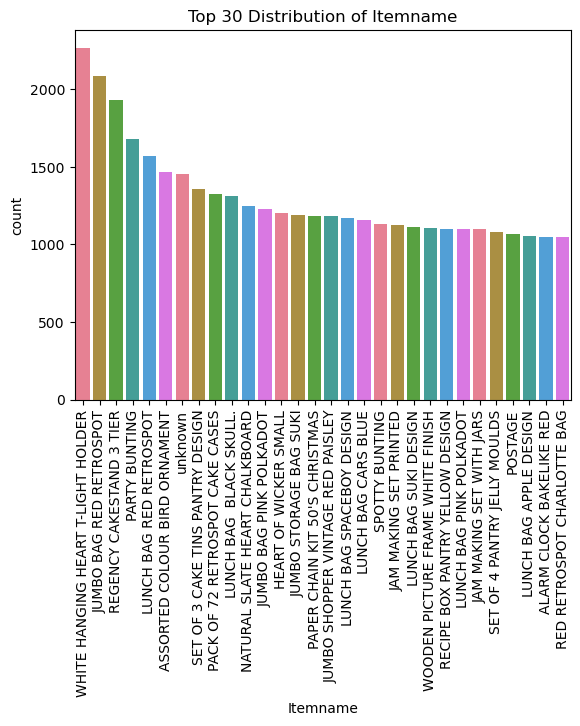

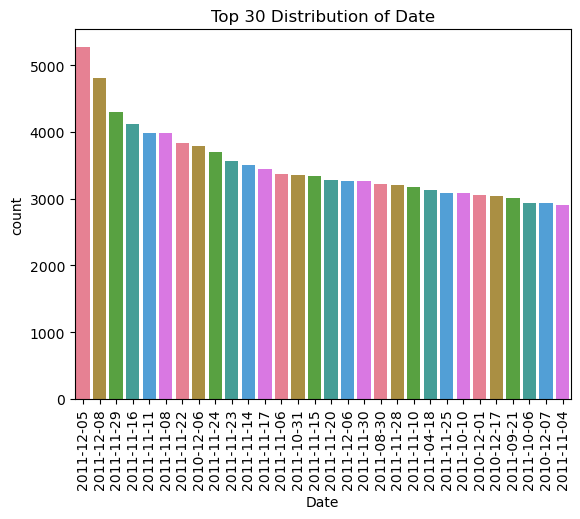

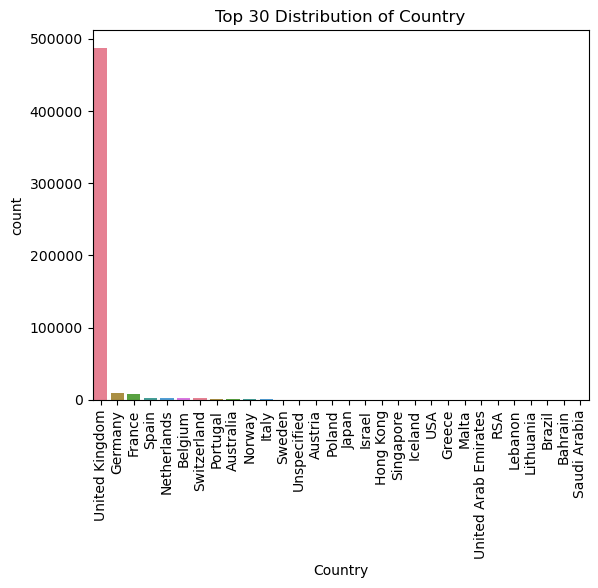

In [44]:
palette = sns.color_palette("husl")
categorical_features = df.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    # Get top 20 categories by frequency
    top_30 = df[feature].value_counts().nlargest(30).index
    
    # Filter dataframe to include only top 20 categories
    filtered_df = df[df[feature].isin(top_30)]
    
    # Plot countplot
    sns.countplot(x=feature, data=filtered_df, palette=palette, order=top_30)
    plt.title(f'Top 30 Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()


# Numerical Features - Histograms + Boxplots


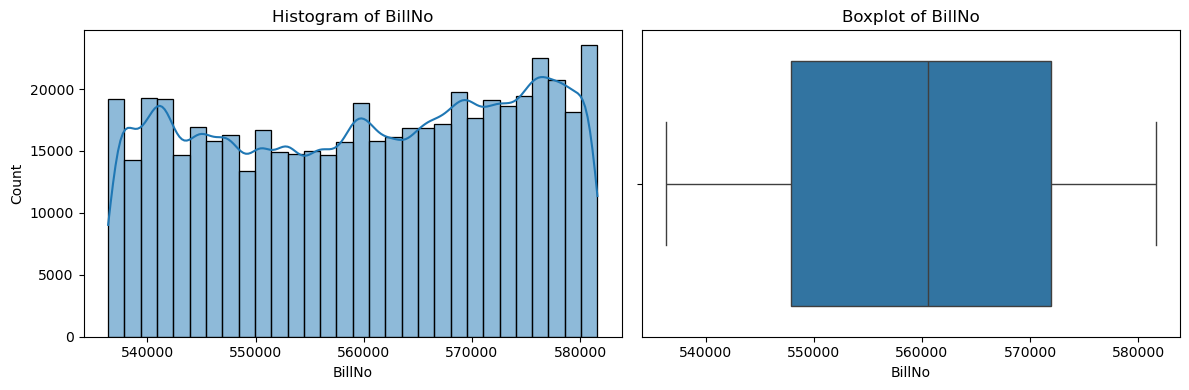

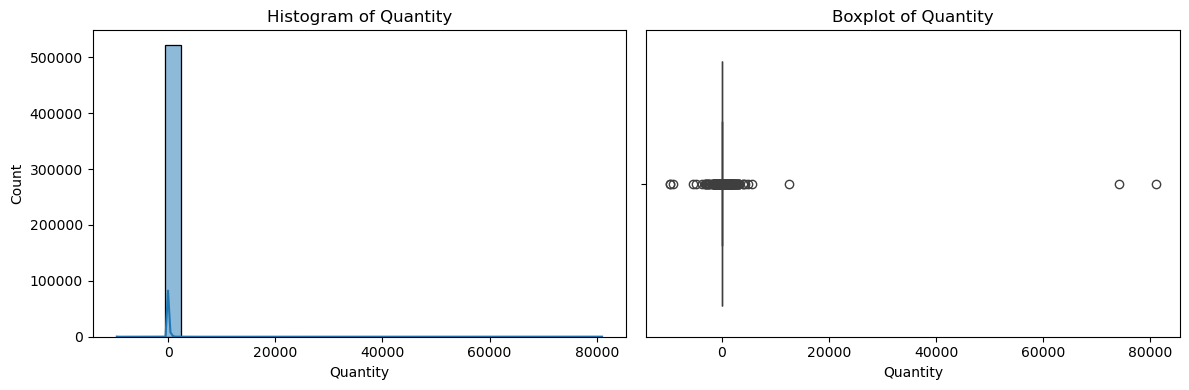

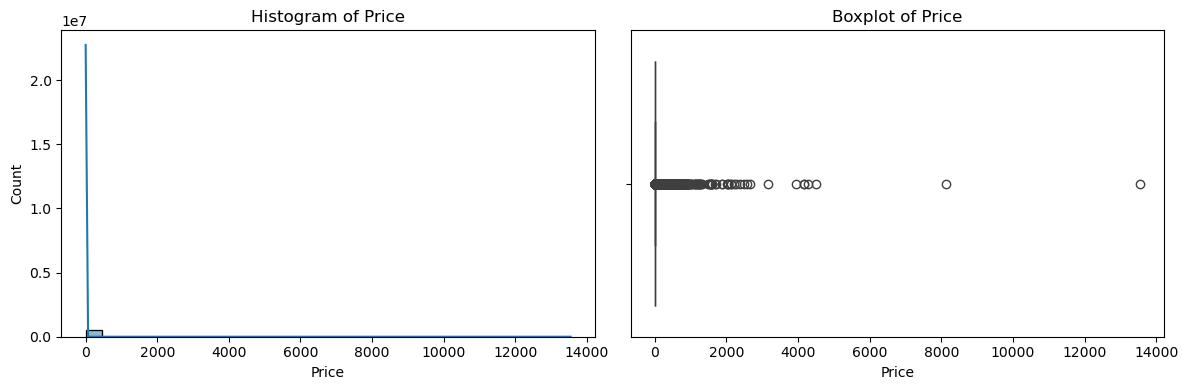

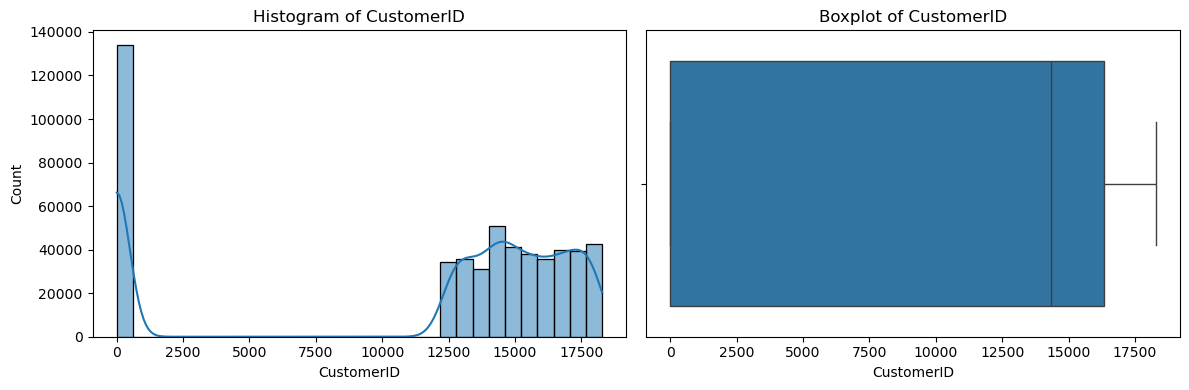

In [46]:
numeric_features = df.select_dtypes(include=["int64","int32", "float64"]).columns

for feature in numeric_features:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature].dropna(), bins=30, kde=True)
    plt.title(f"Histogram of {feature}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature].dropna())
    plt.title(f"Boxplot of {feature}")

    plt.tight_layout()
    plt.show()

# -----

# Data Cleaning for Basket Analysis


In [62]:
# Rename key columns for easier reference
df.rename(columns={
    "BillNo": "Invoice",
    "Itemname": "Item",
    "Quantity": "Quantity",
    "Price": "Price",
    "CustomerID": "CustomerID",
    "Country": "Country"
}, inplace=True, errors="ignore")

# Ensure correct types
if "Price" in df.columns:
    df["Price"] = df["Price"].replace("[\$,]", "", regex=True)
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Remove negative/zero quantities (returns)
if "Quantity" in df.columns:
    df = df[df["Quantity"] > 0]

# Create Revenue column
if "Price" in df.columns and "Quantity" in df.columns:
    df["Revenue"] = df["Price"] * df["Quantity"]

print("\nData after cleaning:", df.shape)



Data after cleaning: (520725, 8)


# Top Items & Revenue Contribution

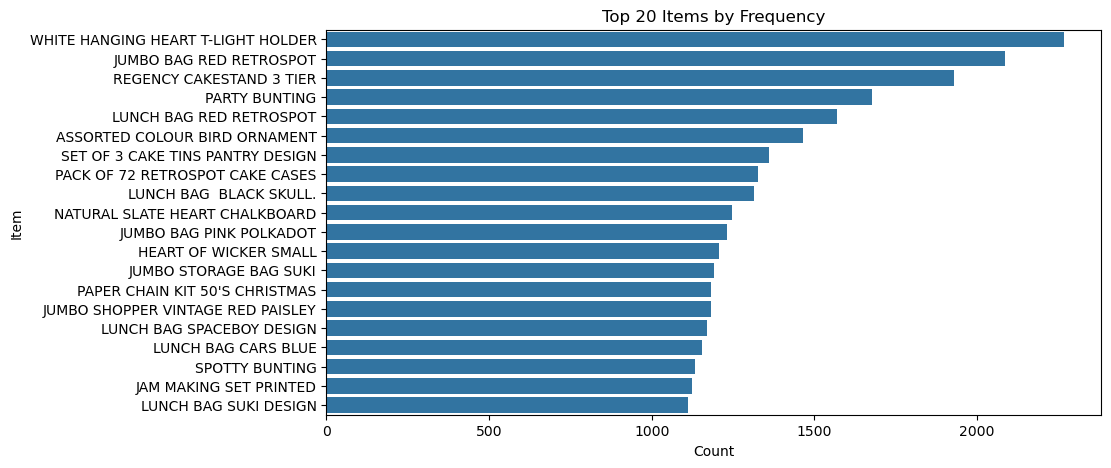

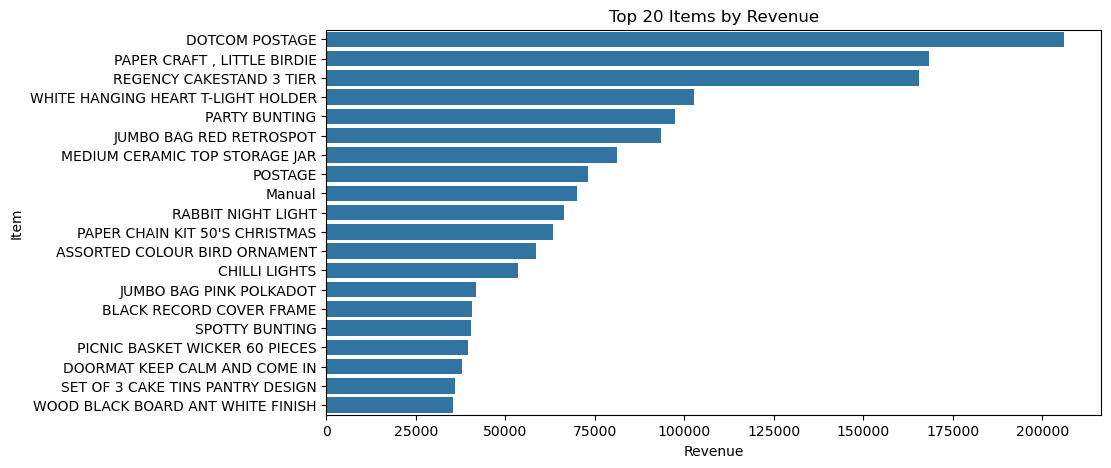

In [65]:
if "Item" in df.columns:
    top_items = df["Item"].value_counts().head(20)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_items.values, y=top_items.index)
    plt.title("Top 20 Items by Frequency")
    plt.xlabel("Count")
    plt.ylabel("Item")
    plt.show()

if "Revenue" in df.columns and "Item" in df.columns:
    top_revenue = df.groupby("Item")["Revenue"].sum().nlargest(20)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_revenue.values, y=top_revenue.index)
    plt.title("Top 20 Items by Revenue")
    plt.xlabel("Revenue")
    plt.ylabel("Item")
    plt.show()


# Market Basket Transaction Building

In [80]:
invoice_col = "Invoice"
item_col = "Item"

if invoice_col in df.columns and item_col in df.columns:
    df[item_col] = df[item_col].astype(str).str.strip().str.lower()

    # Group items by invoice
    transactions = df.groupby(invoice_col)[item_col].agg(lambda x: list(set(x))).tolist()
    print("Number of transactions:", len(transactions))

    # Item frequency
    item_counts = Counter(chain.from_iterable(transactions))
    print("\n Top 20 Items (from transactions):")
    print(item_counts.most_common(20))


Number of transactions: 20324

 Top 20 Items (from transactions):
[('white hanging heart t-light holder', 2202), ('jumbo bag red retrospot', 2064), ('regency cakestand 3 tier', 1904), ('party bunting', 1656), ('lunch bag red retrospot', 1541), ('assorted colour bird ornament', 1431), ('set of 3 cake tins pantry design', 1346), ('pack of 72 retrospot cake cases', 1279), ('lunch bag  black skull.', 1260), ('natural slate heart chalkboard', 1232), ('jumbo bag pink polkadot', 1211), ('heart of wicker small', 1181), ('jumbo storage bag suki', 1178), ('jumbo shopper vintage red paisley', 1166), ('lunch bag spaceboy design', 1147), ("paper chain kit 50's christmas", 1143), ('lunch bag cars blue', 1132), ('jam making set printed', 1116), ('spotty bunting', 1114), ('wooden picture frame white finish', 1092)]


# Simple Pairwise Co-occurrence (Fallback for Apriori)

In [83]:
    n_trans = len(transactions)
    top_items = [it for it, _ in item_counts.most_common(100)]
    pair_counts = Counter()

    for tr in transactions:
        items = [i for i in tr if i in top_items]
        for a, b in combinations(sorted(items), 2):
            pair_counts[(a, b)] += 1

    if pair_counts:
        pairs = pd.DataFrame([
            {"itemA": a, "itemB": b, "count": c}
            for (a, b), c in pair_counts.items()
        ])
        pairs["support"] = pairs["count"] / n_trans
        singles = {it: count / n_trans for it, count in item_counts.items()}
        pairs["confidence_A_to_B"] = pairs["count"] / pairs["itemA"].map(lambda x: item_counts[x])
        pairs["confidence_B_to_A"] = pairs["count"] / pairs["itemB"].map(lambda x: item_counts[x])
        pairs["lift"] = pairs["support"] / (
            pairs["itemA"].map(singles) * pairs["itemB"].map(singles)
        )
        pairs = pairs.sort_values(["support", "lift"], ascending=False)

        print("\nTop 20 Association Pairs:")
        print(pairs.head(20))



Top 20 Association Pairs:
                                  itemA                              itemB  \
322             jumbo bag pink polkadot            jumbo bag red retrospot   
907     green regency teacup and saucer    roses regency teacup and saucer   
195             jumbo bag red retrospot             jumbo storage bag suki   
362             jumbo bag red retrospot  jumbo shopper vintage red paisley   
2            alarm clock bakelike green           alarm clock bakelike red   
234             lunch bag  black skull.            lunch bag red retrospot   
2880    green regency teacup and saucer     pink regency teacup and saucer   
151             lunch bag pink polkadot            lunch bag red retrospot   
95       jumbo  bag baroque black white            jumbo bag red retrospot   
1014            jumbo bag red retrospot            lunch bag red retrospot   
2932     pink regency teacup and saucer    roses regency teacup and saucer   
3395            lunch bag red retrosp

# Save results

In [86]:
pairs.to_csv("top_pairs.csv", index=False)
print("\nAssociation pairs saved to top_pairs.csv")


Association pairs saved to top_pairs.csv
